In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
import plotly.express as px
import plotly.graph_objects as go

baca_data = pd.read_csv('Economic Data - 9 Countries (1980-2020).csv')
baca_data.head(30)

,stock index,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
0,NASDAQ,United States of America,1980.0,168.61,2.23,0.14,21.59,1.0,0.09,12575.0,0.07,NaN,-13.06,0.11
1,NASDAQ,United States of America,1981.0,203.15,2.31,0.10,31.77,1.0,0.12,13976.0,0.08,NaN,-12.52,0.14
2,NASDAQ,United States of America,1982.0,188.98,2.28,0.06,28.52,1.0,0.04,14434.0,0.10,NaN,-19.97,0.13
3,NASDAQ,United States of America,1983.0,285.43,2.46,0.03,26.19,1.0,0.09,15544.0,0.10,NaN,-51.64,0.11
4,NASDAQ,United States of America,1984.0,248.89,2.40,0.04,25.88,1.0,0.11,17121.0,0.08,NaN,-102.73,0.12
5,NASDAQ,United States of America,1985.0,290.25,2.46,0.04,24.09,1.0,0.07,18237.0,0.07,NaN,-114.02,0.11
6,NASDAQ,United States of America,1986.0,366.97,2.56,0.02,12.51,1.0,0.06,19071.0,0.07,NaN,-131.87,0.08
7,NASDAQ,United States of America,1987.0,402.57,2.60,0.04,15.40,1.0,0.06,20039.0,0.06,NaN,-144.77,0.08
8,NASDAQ,United States of America,1988.0,374.43,2.57,0.04,12.58,1.0,0.08,21417.0,0.05,NaN,-109.39,0.09
9,NASDAQ,United States of America,1989.0,437.80,2.64,0.05,15.86,1.0,0.08,22857.0,0.05,NaN,-86.74,0.08


In [37]:
baca_data.columns
ngubah_nama = baca_data.rename(columns={'stock index':'Nama Kode','country':'Kota','year':'Tahun','index price':'Indeks Harga',
                                       'log_indexprice':'Log Indeks Harga','inflationrate':'Rate Inflasi','oilprice':'Harga Oil',
                                        'exchange_rate':'Pertukaran Harga','gdppercent':'GDP','percapitaincome':'Income Perkapitan',
                                       'unemploymentrate':'Rate Pengangguran','manufacturingoutput':'Manufaktur','tradebalance':'Keseimbangan Harga',
                                       'USTreasury':'US Treasury'})
ngubah_nama.head(30)

,Nama Kode,Kota,Tahun,Indeks Harga,Log Indeks Harga,Rate Inflasi,oil prices,Pertukaran Harga,GDP,Income Perkapitan,Rate Pengangguran,Manufaktur,Keseimbangan Harga,US Treasury
0,NASDAQ,United States of America,1980.0,168.61,2.23,0.14,21.59,1.0,0.09,12575.0,0.07,NaN,-13.06,0.11
1,NASDAQ,United States of America,1981.0,203.15,2.31,0.10,31.77,1.0,0.12,13976.0,0.08,NaN,-12.52,0.14
2,NASDAQ,United States of America,1982.0,188.98,2.28,0.06,28.52,1.0,0.04,14434.0,0.10,NaN,-19.97,0.13
3,NASDAQ,United States of America,1983.0,285.43,2.46,0.03,26.19,1.0,0.09,15544.0,0.10,NaN,-51.64,0.11
4,NASDAQ,United States of America,1984.0,248.89,2.40,0.04,25.88,1.0,0.11,17121.0,0.08,NaN,-102.73,0.12
5,NASDAQ,United States of America,1985.0,290.25,2.46,0.04,24.09,1.0,0.07,18237.0,0.07,NaN,-114.02,0.11
6,NASDAQ,United States of America,1986.0,366.97,2.56,0.02,12.51,1.0,0.06,19071.0,0.07,NaN,-131.87,0.08
7,NASDAQ,United States of America,1987.0,402.57,2.60,0.04,15.40,1.0,0.06,20039.0,0.06,NaN,-144.77,0.08
8,NASDAQ,United States of America,1988.0,374.43,2.57,0.04,12.58,1.0,0.08,21417.0,0.05,NaN,-109.39,0.09
9,NASDAQ,United States of America,1989.0,437.80,2.64,0.05,15.86,1.0,0.08,22857.0,0.05,NaN,-86.74,0.08


In [38]:
ngubah_nama['Indeks Harga'] = ngubah_nama['Indeks Harga'].fillna(ngubah_nama['Indeks Harga'].mean())
ngubah_nama['Rate Inflasi'] = ngubah_nama['Rate Inflasi'].fillna(ngubah_nama['Rate Inflasi'].mean())
ngubah_nama['Pertukaran Harga'] = ngubah_nama['Pertukaran Harga'].fillna(ngubah_nama['Pertukaran Harga'].mean())
ngubah_nama['GDP'] = ngubah_nama['GDP'].fillna(ngubah_nama['GDP'].mode()[0])
ngubah_nama['Income Perkapitan'] = ngubah_nama['Income Perkapitan'].fillna(ngubah_nama['Income Perkapitan'].mean())
ngubah_nama['Rate Pengangguran'] = ngubah_nama['Rate Pengangguran'].fillna(ngubah_nama['Rate Pengangguran'].median())
ngubah_nama['Manufaktur'] = ngubah_nama['Manufaktur'].fillna(ngubah_nama['Manufaktur'].mean())
ngubah_nama['Keseimbangan Harga'] = ngubah_nama['Keseimbangan Harga'].fillna(ngubah_nama['Keseimbangan Harga'].median())
ngubah_nama.head(50)

,Nama Kode,Kota,Tahun,Indeks Harga,Log Indeks Harga,Rate Inflasi,oil prices,Pertukaran Harga,GDP,Income Perkapitan,Rate Pengangguran,Manufaktur,Keseimbangan Harga,US Treasury
0,NASDAQ,United States of America,1980.0,168.610000,2.23,0.140000,21.59,1.00,0.09,12575.0,0.07,328.08482,-13.06,0.11
1,NASDAQ,United States of America,1981.0,203.150000,2.31,0.100000,31.77,1.00,0.12,13976.0,0.08,328.08482,-12.52,0.14
2,NASDAQ,United States of America,1982.0,188.980000,2.28,0.060000,28.52,1.00,0.04,14434.0,0.10,328.08482,-19.97,0.13
3,NASDAQ,United States of America,1983.0,285.430000,2.46,0.030000,26.19,1.00,0.09,15544.0,0.10,328.08482,-51.64,0.11
4,NASDAQ,United States of America,1984.0,248.890000,2.40,0.040000,25.88,1.00,0.11,17121.0,0.08,328.08482,-102.73,0.12
5,NASDAQ,United States of America,1985.0,290.250000,2.46,0.040000,24.09,1.00,0.07,18237.0,0.07,328.08482,-114.02,0.11
6,NASDAQ,United States of America,1986.0,366.970000,2.56,0.020000,12.51,1.00,0.06,19071.0,0.07,328.08482,-131.87,0.08
7,NASDAQ,United States of America,1987.0,402.570000,2.60,0.040000,15.40,1.00,0.06,20039.0,0.06,328.08482,-144.77,0.08
8,NASDAQ,United States of America,1988.0,374.430000,2.57,0.040000,12.58,1.00,0.08,21417.0,0.05,328.08482,-109.39,0.09
9,NASDAQ,United States of America,1989.0,437.800000,2.64,0.050000,15.86,1.00,0.08,22857.0,0.05,328.08482,-86.74,0.08


In [39]:
ngubah_nama.isna().sum()

Nama Kode             0
Kota                  0
Tahun                 0
Indeks Harga          0
Log Indeks Harga      0
Rate Inflasi          0
oil prices            0
Pertukaran Harga      0
GDP                   0
Income Perkapitan     0
Rate Pengangguran     0
Manufaktur            0
Keseimbangan Harga    0
US Treasury           0
dtype: int64

In [40]:
#Analisis Data baru prediksi say 
ngubah_nama['Kota'].value_counts()

United States of America    41
United Kingdom              41
India                       41
Japan                       41
Hong Kong                   41
China                       41
Germany                     41
France                      41
Spain                       41
Name: Kota, dtype: int64

In [41]:
figure = px.bar(ngubah_nama, y='Income Perkapitan', x='Kota',
            title="Highest Income Perkapitan")
figure.show()

In [48]:
fig = go.Figure()#grafik untuk ngebandingin biasanya speerti kasus kematian vs kasus ... 
fig.add_trace(go.Bar(
    x=ngubah_nama["Kota"],
    y=ngubah_nama["Indeks Harga"],
    name='Indeks Harga',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=ngubah_nama["Kota"],
    y=ngubah_nama["Income Perkapitan"],
    name='Income Perkapitan',
    marker_color='Yellow'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [43]:
#DISINI BARU MENGAMBIL HANYA NEGARA AMERIKA SAJA YANG MAU DILIAT INCOME DITAHUN BERIKUTNYA
ou = ngubah_nama.drop(columns=['Nama Kode','Log Indeks Harga','oil prices','Pertukaran Harga','GDP','Rate Pengangguran','Manufaktur','Keseimbangan Harga','US Treasury'])
dfdrop = ou.drop(ou.index[41:369])
dfdrop

,Kota,Tahun,Indeks Harga,Rate Inflasi,Income Perkapitan
0,United States of America,1980.0,168.61,0.140000,12575.0
1,United States of America,1981.0,203.15,0.100000,13976.0
2,United States of America,1982.0,188.98,0.060000,14434.0
3,United States of America,1983.0,285.43,0.030000,15544.0
4,United States of America,1984.0,248.89,0.040000,17121.0
5,United States of America,1985.0,290.25,0.040000,18237.0
6,United States of America,1986.0,366.97,0.020000,19071.0
7,United States of America,1987.0,402.57,0.040000,20039.0
8,United States of America,1988.0,374.43,0.040000,21417.0
9,United States of America,1989.0,437.80,0.050000,22857.0


In [16]:
dfdrop.describe()

,Tahun,Indeks Harga,Rate Inflasi,Income Perkapitan
count,41.000000,41.000000,41.000000,41.000000
mean,2000.000000,2282.994878,0.033744,36879.365854
std,11.979149,2342.760624,0.023131,15733.812858
min,1980.000000,168.610000,0.010000,12575.000000
25%,1990.000000,437.800000,0.020000,23889.000000
50%,2000.000000,1794.910000,0.030000,36335.000000
75%,2010.000000,2728.150000,0.040000,48467.000000
max,2020.000000,10201.510000,0.140000,65280.000000


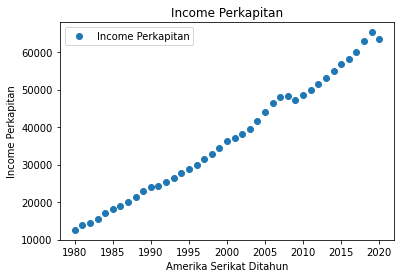

In [17]:
dfdrop.plot(x='Tahun',y='Income Perkapitan', style = 'o')
plt.title('Income Perkapitan')
plt.xlabel('Amerika Serikat Ditahun')
plt.ylabel('Income Perkapitan')
plt.show()

In [18]:
x = dfdrop['Tahun'].values.reshape(-1, 1)
y = dfdrop['Income Perkapitan'].values.reshape(-1, 1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [21]:
print(regressor.coef_)
print(regressor.intercept_)

[[1312.3408161]]
[-2587822.58398762]


In [22]:
regressor.score(x_test, y_test)

0.9941258353801321

Text(0.5, 1.0, 'Plot Tahun dan Income')

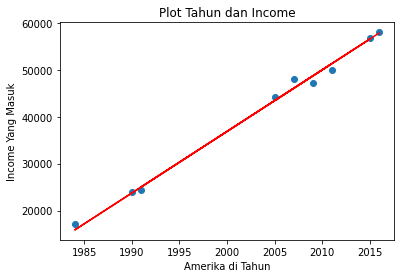

In [23]:
y_prediksi = regressor.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Amerika di Tahun')
plt.ylabel('Income Yang Masuk')
plt.title('Plot Tahun dan Income')